In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import cv2
from tqdm import tqdm
from keras.models import load_model
import pickle


In [1]:
import tensorflow as tf
print(tf.__version__)

import keras
print(keras.__version__)

2.3.0
2.4.3


In [38]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'D:/images/train',
        target_size=(48, 48),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'D:/images/validation',
        target_size=(48, 48),
        batch_size=32,
        class_mode='categorical')

Found 23839 images belonging to 6 classes.
Found 5850 images belonging to 6 classes.


In [41]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))

model.add(MaxPooling2D(pool_size=(2,2)))
        #Dropout(0.5)

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.2)
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(6, activation='softmax'))

        #-----------set model compilation attributes------------------------
        
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

        
        #--------to just see  the Model detials-----------------------------
model.summary()

history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks
)

history=model.fit(
        train_generator.flow(X_train, y_train, batch_size=batch_size),
        steps_per_epoch=1000,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=400,shuffle=True)

    #-------------------Save the model on device------------------------
model.save("CNN_Model.h5")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 16)          4624      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)              

UnimplementedError:  Fused conv implementation does not support grouped convolutions for now.
	 [[node sequential_6/conv2d_15/Relu (defined at <ipython-input-41-4b9cf3b8c9b2>:30) ]] [Op:__inference_train_function_7803]

Function call stack:
train_function


 17%|█▋        | 166/960 [00:00<00:00, 1658.38it/s]

length of traning data= 23839


100%|██████████| 797/797 [00:00<00:00, 1633.27it/s]


5850
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_18 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_19 (Batc (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 128) 

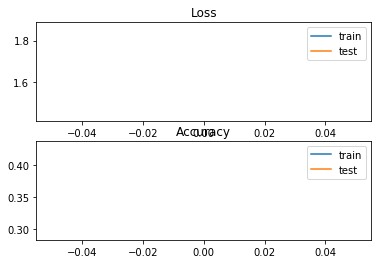

In [5]:
class CreateModel():
    TRAIN_DATADIR = "D:\images\\train"
    Validation_DATADIR = "D:\images\\validation"
    CATEGORIES = ["angry","disgust","fear" ,"happy","sad","surprise"]
    IMG_SIZE = 48
    training_data = []
    Validation_data=[]
    train_datagen = ImageDataGenerator(rotation_range=15,shear_range=0.15,zoom_range=0.15,horizontal_flip=True,)

#---------Create the validation Data According to our dataset inputs and labels----------------------
    def create_training_data(self):  #Function That Create Training Data Form File
        for category in self.CATEGORIES:  # do for all Face Categories

            path = os.path.join(self.TRAIN_DATADIR,category)  #create path to Faces
            class_num = self.CATEGORIES.index(category)  #get the classification(0 to 5). 0=Angry 1=Disgust....

            for img in tqdm(os.listdir(path)):  # iterate over each image per Face Categories
                try:
                    
                    Original_img = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                   
                    laplacian =cv2.Laplacian(Original_img,cv2.CV_64F)
                    img_array=Original_img-laplacian  
                    # new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                    self.training_data.append([img_array, class_num])  # add this to our training_data
                except Exception as e:  # in the interest in keeping the output clean...
                    pass
       #print('lenght of training data : %' % len(self.training_data))    
 #finally Call Function To Create Train Data


#def plotImages(images_arr):
 #   fig, axes = plt.subplots(1, 5, figsize=(20,20))
  #  axes = axes.flatten()
   # for img, ax in zip( images_arr, axes):
    #    ax.imshow(img)
     #   ax.axis('off')
        
   # plt.tight_layout()
   # plt.show()
#aug = [training_data[0][0] for i in range(10)]
#plotImages(aug) 

#---------Create the validation Data According to our dataset inputs and labels----------------------
    def create_Validation_data(self):
        for category in self.CATEGORIES:  # do for all Face Categories
            path = os.path.join(self.Validation_DATADIR,category)  #create path to Faces
            class_num = self.CATEGORIES.index(category)  #get the classification(0 to 5).0=Angry 1=Disgust ....

            for img in tqdm(os.listdir(path)):  # iterate over each image per Face Categories
                try:
                    Original_img = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                    laplacian =cv2.Laplacian(Original_img,cv2.CV_64F)
                    img_array=Original_img-laplacian  
                    
                    #img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                    #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                    self.Validation_data.append([img_array, class_num])  # add this to our Validation_data
                except Exception as e:  # in the interest in keeping the output clean...
                    pass

#------------shuffle the Training data And Validation Data----------------
#random.shuffle(training_data)#shuffle the training data
#random.shuffle(Validation_data)#shuffle the validation data

    X = [] #for Input of Train Data
    y = [] #for Labels of Train DAta
    VAl_X = [] #for Input of Validation_data
    VAl_y = [] #for Labels of Validation_data

#-----------Split features and labels from training and validation dataset also ------------------------
    def split_train_test_data(self):
        #----------Store traning and validating dataset features and labels into different variables--------
        for features,label in self.training_data:
            self.X.append(features)
            self.y.append(label)

        for features,label in self.Validation_data:
            self.VAl_X.append(features)
            self.VAl_y.append(label)

        # reshape data to have a single channel
        #VAl_X = np.array(VAl_X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        self.y=np.array(self.y)
        self.VAl_y=np.array(self.VAl_y)


            #-----------------store Encoded Data Set for Futhare use if required Shape the dataset according to your model requirment(input)------------------------

        3
         #   3pickle_out = open("X.pickle","wb")
        #pickle.dump(self.X, pickle_out)
        #pickle_out.close()

        #pickle_out = open("y.pickle","wb")
        #pickle.dump(self.y, pickle_out)
        #pickle_out.close()

        #pickle_out = open("VAl_X.pickle","wb")
        #pickle.dump(self.VAl_X, pickle_out)
        #pickle_out.close()

        #pickle_out = open("VAl_y.pickle","wb")
        #pickle.dump(self.VAl_y, pickle_out)
        #pickle_out.close()


            #----------------Shape the dataset according to your model requirment(input)--------------
        self.X=np.array(self.X)
        self.VAl_X = np.array(self.VAl_X)
        self.X = self.X.reshape((self.X.shape[0], self.X.shape[1], self.X.shape[2], 1))
        self.VAl_X = self.VAl_X.reshape((self.VAl_X.shape[0], self.VAl_X.shape[1], self.VAl_X.shape[2], 1))
        
        self.X = self.X.astype('float32')
        self.X=self.X/255.
        self.VAl_X = self.VAl_X.astype('float32')
        self.VAl_X =self.VAl_X/255.
        
        self.train_datagen.fit(self.X)
        



    #-----------model definition----------------
    #-------------create the model attributes-------------------
    def createCnnModel(self):
        
        
        
        model = Sequential()
        model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(48, 48, 1)))
        model.add(BatchNormalization())

        model.add(Conv2D(64, (3, 3), activation='relu'))    
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.6))
        
        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        
        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.5))
        
        model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
       
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.6))
        
        model.add(Dense(32, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        
        model.add(Dense(6, activation='softmax'))

        #-----------set model compilation attributes------------------------
        model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

        #--------to just see  the Model detials-----------------------------
        model.summary()
        #-------train the model on data set---------------------------------
        #history=model.fit(self.X,self.y, epochs=50,steps_per_epoch=1000,validation_data=(self.VAl_X,self.VAl_y),shuffle=True)#,steps_per_epoch=200
        #history=model.fit(self.X,self.y, epochs=5,validation_data=(self.VAl_X,self.VAl_y),shuffle=True)#validation_split=0.1,steps_per_epoch=200

        history = model.fit(self.train_datagen.flow(self.X, self.y, batch_size=32),epochs=1,validation_data=(self.VAl_X,self.VAl_y),shuffle=True)
    #-------------------Save the model on device------------------------
        model.save("CNN_Model.h5")

        #-----------------------evaluate the model to show the accuracy and losses-----------
        _, train_acc = model.evaluate(self.X,self.y)
        _, test_acc = model.evaluate(self.VAl_X, self.VAl_y)
        print('Train: %.3f, Test: %.3f' % (train_acc,test_acc))
        #----------------------plot loss during training-------------------------------

        #---------------------import libery for Plot the Accuracy and losses on graph------------------------
        from matplotlib import pyplot

        #-------------------------plot losses during training-----------------------------
        pyplot.subplot(211)
        pyplot.title('Loss')
        pyplot.plot(history.history['loss'], label='train')
        pyplot.plot(history.history['val_loss'], label='test')
        pyplot.legend()
        #-------------------------plot accuracy during training-----------------------------
        pyplot.subplot(212)
        pyplot.title('Accuracy')
        pyplot.plot(history.history['accuracy'], label='train')
        pyplot.plot(history.history['val_accuracy'], label='test')
        pyplot.legend()
        pyplot.show()
        
createmodel = CreateModel()    
createmodel.create_training_data()
print('length of traning data= %d' %len(createmodel.training_data))
createmodel.create_Validation_data()
print(len(createmodel.Validation_data))
createmodel.split_train_test_data()
createmodel.createCnnModel()

In [3]:
    #---------------model prediction------------------------------------------------------
    from keras.models import load_model
    import cv2 
    import numpy as np
    from tensorflow.keras.layers import Flatten
    from numpy import argmax ,asarray

    #--------------Load the saved model from file
    model = load_model('Cnnmodel.h5')

    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #-----------Read and reshape the Image for prediction-----------------------
    img = cv2.imread('test1.jpg',cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(48,48))
    img = img.reshape((img.shape[0], img.shape[1], 1))
    img = img.astype('float32') / 255.0
    classes = model.predict(asarray([img]))
    #-----------------print the predicted class for given image-------------------------------
    print('Predicted: class=%d' % argmax(classes))
    y_classes = classes.argmax(axis=1)
    print(CATEGORIES[int(y_classes)])
    #----------------------------------------------------------------------------------------

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
pickle_in = open("SavedDataSet\X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("SavedDataSet\y.pickle","rb")

y = pickle.load(pickle_in)


pickle_in = open("SavedDataSet\VAl_X.pickle","rb")

VAl_X = pickle.load(pickle_in)



pickle_in = open("SavedDataSet\VAl_y.pickle","rb")

VAl_y = pickle.load(pickle_in)
        

In [5]:
from numpy import argmax ,asarray

model = load_model('CNN_Model4.h5')
        
CATEGORIES = ["angry","disgust","fear","happy","sad","surprise"]
#CATEGORIES = ["angry","fear" ,"happy","neutral","sad","surprise"]


model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
        #-----------Read and reshape the Image for prediction-----------------------
        #img = cv2.imread('faces_detected.jpg',cv2.IMREAD_GRAYSCALE)
        

Original_img = cv2.imread('test images/angry.jpg',cv2.IMREAD_GRAYSCALE)
laplacian =cv2.Laplacian(Original_img,cv2.CV_64F)
img=Original_img-laplacian


img = cv2.resize(img,(48,48))
img = img.reshape((img.shape[0], img.shape[1], 1))
img = img.astype('float32') / 255.0

shape=img.shape[1:]
print(shape)
classes = model.predict(np.asarray([img]))
        #-----------------print the predicted class for given image-------------------------------
print(classes)
print('Predicted: class=%d' % np.argmax(classes))   
y_classes = classes.argmax(axis=1)
print('You are : %s' %CATEGORIES[int(y_classes)] +' with accuracy of : %d percent' %(classes[0][y_classes]*100))

(48, 1)
[[0.8059083  0.00429055 0.1544658  0.01644042 0.01377782 0.00511705]]
Predicted: class=0
You are : angry with accuracy of : 80 percent


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
from PyQt5 import QtWidgets, uic
from PyQt5.QtMultimedia import *
from matplotlib import pyplot
from PyQt5 import QtCore
from PyQt5 import QtGui
from tqdm import tqdm
import import_ipynb
import numpy as np
import pickle
import cv2 
import sys
import os
from CNN_Model import CNN_Model
from Train_Test_Data import train_test_data